In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\DELL\EDA\diabetic_patient_analysis\diabetic_patient_dataset\diabetics.csv")

In [3]:
df = pd.DataFrame(df)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df['Outcome'].isnull().sum()

0

In [6]:
# preprocessing 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# fd = df[~df['BloodPressure'].isna()]
# fd.head(2)

In [9]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3-q1

In [10]:
df = df[~((df<(q1- 1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
# df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
df.shape

(639, 9)

In [12]:
# ploting

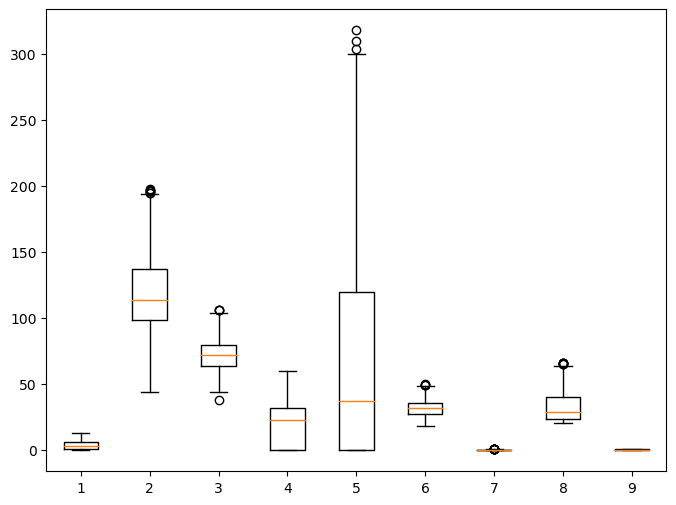

In [13]:
plt.figure(figsize=(8,6 ))
plt.boxplot(df);

In [14]:
cor = df.corr()

<Axes: >

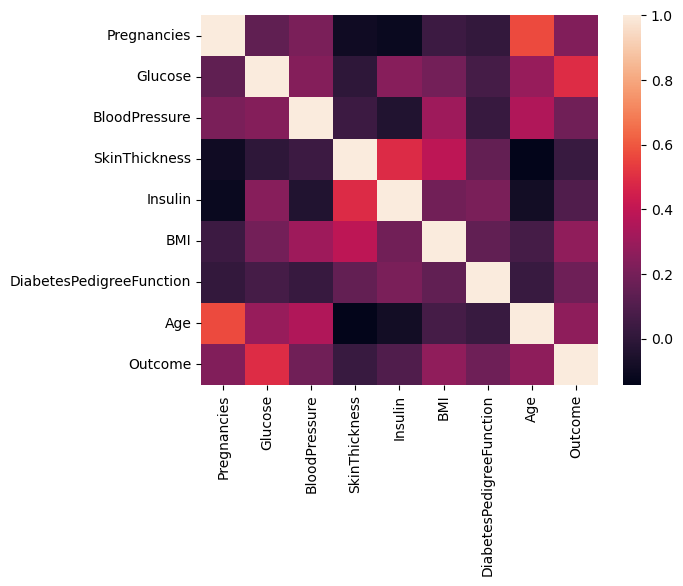

In [15]:
sns.heatmap(cor)

In [16]:
cor.sort_values(ascending=False, by='Outcome')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000
Glucose,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BMI,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
Age,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Pregnancies,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
BloodPressure,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Insulin,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
SkinThickness,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676


<Axes: xlabel='Outcome', ylabel='Glucose'>

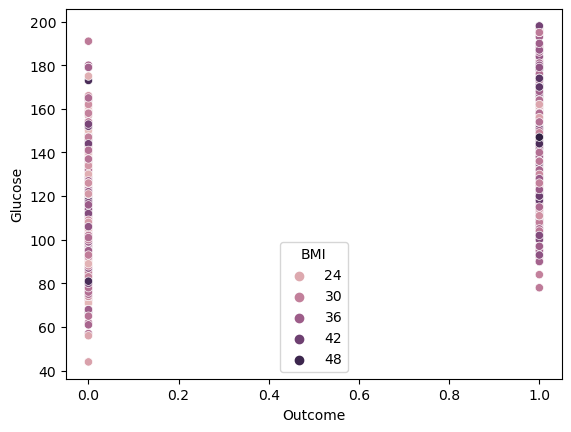

In [17]:
sns.scatterplot(x = 'Outcome', y = 'Glucose',hue = 'BMI', data = df)

# Outcome: 

1. People with more glucose above 80 tend to have diabatics.
2. People have glucose below 80 have low tendency to diabatics.

In [18]:
#target variable
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


#test_train split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=65)

In [ ]:
scalar = StandardScaler()


In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [23]:
model.score(X_train, y_train)

0.8901869158878505

In [24]:
y_pred = model.predict(X_test)

In [32]:
#Check for overfitting and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))


Training set score: 0.8902
Test set score: 0.7393


In [34]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7393364928909952